In [1]:
# Import library
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import os
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
!pip install gdown
import gdown

# ID file dari Google Drive
file_id = '1qk14HCnEWFrmi2dtjbjTD--n8ajUDOI0'
url = f'https://drive.google.com/uc?id={file_id}'

# Unduh file model
gdown.download(url, 'best_model.h5', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1qk14HCnEWFrmi2dtjbjTD--n8ajUDOI0
To: /content/best_model.h5
100%|██████████| 66.4M/66.4M [00:00<00:00, 71.1MB/s]


'best_model.h5'

In [3]:
# Load model hasil training
model = load_model('best_model.h5')

In [4]:
# Kelas dan grup
class_names = [
    'Baterai', 'Daun', 'Elektronik', 'Kaca', 'Kardus',
    'Kertas', 'Lampu', 'Logam', 'Pakaian',
    'Plastik', 'Sampah Makanan', 'Sterofom'
]

group_map = {
    'Logam': 'Anorganik',
    'Plastik': 'Anorganik',
    'Pakaian': 'Anorganik',
    'Kaca': 'Anorganik',
    'Sterofom': 'Anorganik',
    'Daun': 'Organik',
    'Kardus': 'Organik',
    'Sampah Makanan': 'Organik',
    'Kertas': 'Organik',
    'Baterai': 'B3',
    'Lampu': 'B3',
    'Elektronik': 'B3'
}

In [5]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(img_path):
    img_ready = prepare_image(img_path)
    preds = model.predict(img_ready)
    pred_idx = np.argmax(preds, axis=1)[0]
    pred_class = class_names[pred_idx]
    pred_group = group_map.get(pred_class, 'Unknown')
    return pred_class, pred_group

Saving sampah plastik.jpg to sampah plastik (1).jpg


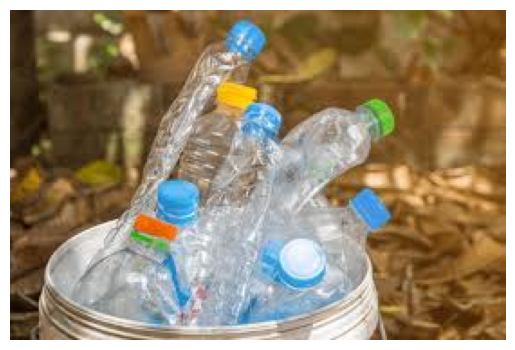

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
sampah plastik (1).jpg -> Kategori: Anorganik


In [7]:
# Upload gambar lewat dialog
uploaded = files.upload()

for filename in uploaded.keys():
    # Preview gambar
    img = Image.open(filename)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Prediksi
    pred_class, pred_group = predict_image(filename)
    print(f"{filename} -> Kategori: {pred_group}")